#  2013 Credit Card Fraud

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading In Credit Card Data

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


C:\Anaconda3\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Amount distribution')

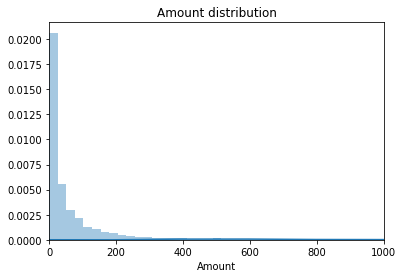

In [3]:
sns.distplot(df.Amount, bins=1000)
plt.xlim(0,1000)
plt.title('Amount distribution')

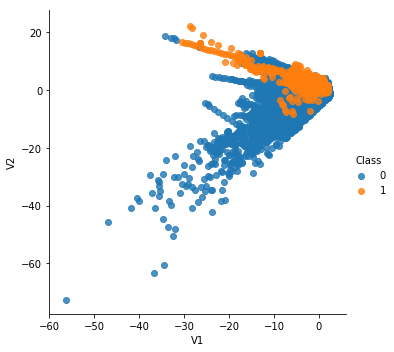

In [5]:
sns.lmplot('V1', 'V2', data=df, hue='Class',fit_reg=False)

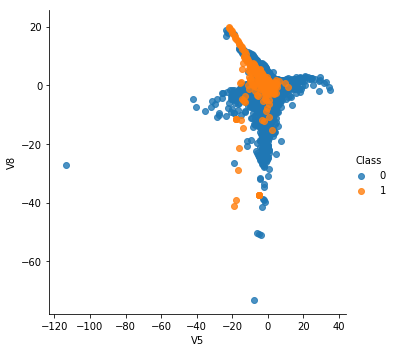

In [6]:
sns.lmplot('V5', 'V8', data=df, hue='Class',fit_reg=False)

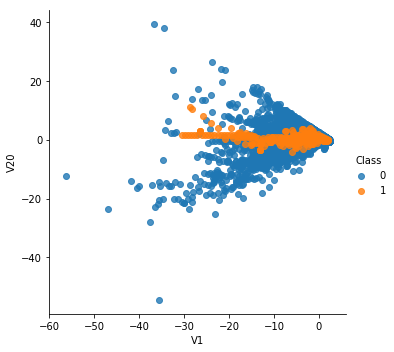

In [7]:
sns.lmplot('V1', 'V20', data=df, hue='Class',fit_reg=False)

In [8]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Balancing Target Column

In [9]:
from sklearn.utils import resample

In [10]:
# Separate majority and minority classes
df_majority = df[df.Class==0]
df_minority = df[df.Class==1]

In [11]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=284315,random_state=123) 

In [12]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [13]:
# Display new class counts
df_upsampled.Class.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

## Logistic Regression Model

In [14]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_predict
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression

C:\Anaconda3\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
lr = LogisticRegression()

In [16]:
# Separate input features (X) and target variable (y)
y = df_upsampled.Class
X = df_upsampled.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Train model
Lrc = LogisticRegression().fit(X_train, y_train)

In [17]:
# Predict on training set
cross_val_score(Lrc, X, y, cv= 10)

array([0.87315349, 0.92297411, 0.92772228, 0.93384215, 0.94479811,
       0.94108543, 0.9457986 , 0.9443741 , 0.94970279, 0.95817945])

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
lr_pred = Lrc.predict(X_test)

In [20]:
print(confusion_matrix(y_test, lr_pred))
print('\n')
print(classification_report(y_test, lr_pred))

[[91269  2473]
 [ 9305 84601]]


             precision    recall  f1-score   support

          0       0.91      0.97      0.94     93742
          1       0.97      0.90      0.93     93906

avg / total       0.94      0.94      0.94    187648



### Logistic Regression Analysis

Looking at the Logistical regression model. It is good, but it has some room for improvement, mislabeling 9271 fraudulent transactions and 2418 normal transactions.  Since are data has had PCA applied to it already. We are unable to rank our datasets features using the coeffcients removing one of this models strenghts.  Lets try a random forest model and see if we can improve the results. 

## Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestClassifier

C:\Anaconda3\envs\py36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [22]:
# Separate input features (X) and target variable (y)
y = df_upsampled.Class
X = df_upsampled.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Train model
Rfc = RandomForestClassifier()
Rfc.fit(X_train, y_train)
 
# Predict on training set
cross_val_score(Rfc.fit(X_train, y_train), X, y, cv= 10)

array([0.99359876, 0.99992966, 0.99996483, 1.        , 0.99992966,
       0.99977138, 0.99998241, 1.        , 1.        , 0.99992965])

In [23]:
rf_pred = Rfc.predict(X_test)

In [24]:
print(confusion_matrix(y_test, rf_pred))
print('\n')
print(classification_report(y_test, rf_pred))

[[93916    12]
 [    0 93720]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93928
          1       1.00      1.00      1.00     93720

avg / total       1.00      1.00      1.00    187648



### Random Forest Analysis

As we can see, the random forest model is incredibly accurate only misclassifying 5 out 187,648 cases.  Of the 5 data points that were missed, all of them were type 1 errors. Mean our model  caught all fraudulent transactions, but predicted 5 normal transactions to be fraudulent.  When in reality, they were regular transactions.  Overall, I think the random forest model is great for this situation, because the values we were working with already had PCA applied to them.  So, we couldn’t tell what features had the most influence over the target value anyways making random forests black box problem irrelevant.

## SVC Model

In [25]:
# Getting two more libs
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

C:\Anaconda3\envs\py36\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [26]:
# Calling model
svc = SVC()

y = df_upsampled.Class
X = df_upsampled.drop(df_upsampled[['Class','Time','Amount']], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [27]:
# standardizing data
ss = StandardScaler().fit_transform(X_train)

In [28]:
# debugging
sklearn_pca = PCA(n_components=5)

# fitting our x training data to pca
Y_sklearn = sklearn_pca.fit_transform(ss)

# adding results to a new data frame
X_PCA = pd.DataFrame(Y_sklearn)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.40368665 0.10410484 0.07394103 0.0580607  0.05350592]


In [ ]:
svc.fit(X_PCA, y_train)

In [14]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [ ]:
# setting grid search with model and params to test
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [ ]:
# fitting data to new grid
grid.fit(X_train, y_train)

### Analysis of Support Vector Classifier

## KNN Model

In [14]:
from sklearn import neighbors

In [19]:
# setting up knn regression model, using the 5 nearest neighbors weighted by distance
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')

In [20]:
# training our model with our training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [21]:
cross_val_score(knn.fit(X_train, y_train), X, y, cv=6)

array([ 0.50394631,  0.50983413,  0.50474824,  0.50635209,  0.50663698,
        0.50222644])

In [37]:
param_grid = {'n_neighbors':[1,3,5,10,15,20,25,30,40,50,75,100],
              'weights':['uniform','distance']}

In [38]:
KNN = neighbors.KNeighborsClassifier()

In [39]:
# setting grid search with model and params to test
grid = GridSearchCV(KNN,param_grid,verbose=3)

In [41]:
grid.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [42]:
# testing the grid predictions v test data
grid_pred = grid.predict(X_test)

In [43]:
# model evaluation
print(confusion_matrix(y_test,grid_pred))
print('\n')
print(classification_report(y_test,grid_pred))

[[93897    72]
 [    0 93679]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93969
          1       1.00      1.00      1.00     93679

avg / total       1.00      1.00      1.00    187648



### Analysis for KNN Model

Looking at the lmplots from earlier it is no surprise that this KNN model is so accuarte.  The 2 classes of data were very cluster, playing into the  K-nearest-neighbors model's strenghts.  Using the data points around the one in question has produced 99.9% accuracy. 

# Conclusion

Overall, I think that the random forest classifier and nearest neighbor model are great options for datasets like this one.  The way the classes features corrilated made the nearest neighbor model extremely accurate and gave the random forest enough binary checkpoints to accurately predict the target outcome.